In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# Set Theory
### Question 1: Function to Check Partition
Write a Python function to check if a given list of sets is a partition of a universal set. The function should take the universal set and the list of sets as arguments and verify the following conditions:
1. The union of all subsets in the list equals the universal set.
2. The subsets are pairwise disjoint.

Write your function and test it with an example.

In [12]:
def check_partition(universal_set, subsets):
    subset_union = set().union(*subsets)
    visited_elements = set()

    if subset_union != universal_set:
        return False

    for subset in subsets:
        for element in subset:
            if element in visited_elements:
                return False
            visited_elements.add(element)

    return True

universal_set = {1, 7, 9, 8, 4, 5, 20, 30, -1, -45, -34, -4, 23, 10}
subset1 = {1, -1, -4}
subset2 = {7, 20, -45, -34}
subset3 = {9, 5}
subset4 = {8, 4, 23}
subset5 = {30, 10}

subsets = [subset1, subset2, subset3, subset4, subset5]

print(check_partition(universal_set, subsets))

True


### Question 2: Laws
With an example numpy array corresponding to set A, B, C, show the distributive properties and De Morgan's Laws. Also, use `venn3` from `matplotlib_venn` library for vizualization.

Distributive Law 1 - A ∪ (B ∩ C) = (A ∪ B) ∩ (A ∪ C): True
Distributive Law 2 - A ∩ (B ∪ C) = (A ∩ B) ∪ (A ∩ C): True
De Morgan's First Law - (A ∪ B)' = A' ∩ B': True
De Morgan's Second Law - (A ∩ B)' = A' ∪ B': True


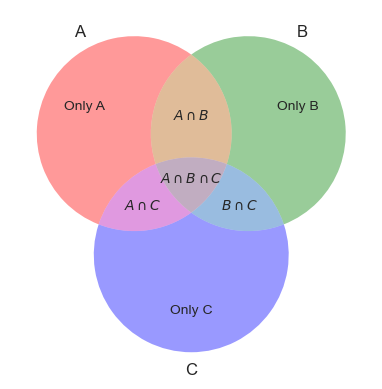

In [8]:
from matplotlib_venn import venn3

universe = np.arange(1, 41)
A = np.arange(1, 11)
B = np.arange(2, 30, 3)
C = np.arange(4, 41, 4)

B_inter_C = np.intersect1d(B, C)
lhs1 = np.union1d(A, B_inter_C)

A_union_B = np.union1d(A, B)
A_union_C = np.union1d(A, C)
rhs1 = np.intersect1d(A_union_B, A_union_C)

print("Distributive Law 1 - A ∪ (B ∩ C) = (A ∪ B) ∩ (A ∪ C):", np.array_equal(lhs1, rhs1))

B_union_C = np.union1d(B, C)
lhs2 = np.intersect1d(A, B_union_C)

A_inter_B = np.intersect1d(A, B)
A_inter_C = np.intersect1d(A, C)
rhs2 = np.union1d(A_inter_B, A_inter_C)

print("Distributive Law 2 - A ∩ (B ∪ C) = (A ∩ B) ∪ (A ∩ C):", np.array_equal(lhs2, rhs2))

A_union_B = np.union1d(A, B)
complement_A_union_B = np.setdiff1d(universe, A_union_B)

complement_A = np.setdiff1d(universe, A)
complement_B = np.setdiff1d(universe, B)
right_dm1 = np.intersect1d(complement_A, complement_B)

print("De Morgan's First Law - (A ∪ B)' = A' ∩ B':", np.array_equal(complement_A_union_B, right_dm1))

A_inter_B = np.intersect1d(A, B)
complement_A_inter_B = np.setdiff1d(universe, A_inter_B)

complement_A = np.setdiff1d(universe, A)
complement_B = np.setdiff1d(universe, B)
right_dm2 = np.union1d(complement_A, complement_B)

print("De Morgan's Second Law - (A ∩ B)' = A' ∪ B':", np.array_equal(complement_A_inter_B, right_dm2))

v = venn3([set(A), set(B), set(C)], ['A', 'B', 'C'])
v.get_label_by_id('100').set_text('Only A')
v.get_label_by_id('010').set_text('Only B')
v.get_label_by_id('001').set_text('Only C')
v.get_label_by_id('110').set_text(r'$A \cap B$')
v.get_label_by_id('101').set_text(r'$A \cap C$')
v.get_label_by_id('011').set_text(r'$B \cap C$')
v.get_label_by_id('111').set_text(r'$A \cap B \cap C$')

### Question 3: Union and Intersection of Students
For below code:
1. The union of all sets of students present across the three subjects.
2. The intersection of all sets of students present across the three subjects.

```python
import pandas as pd
# Dictionary of marks
marks = {
    "Math": {"Alice": 85, "Bob": 90, "Charlie": 78},
    "Physics": {"Bob": 88, "Charlie": 92, "David": 75},
    "Chemistry": {"Alice": 82, "Charlie": 80, "Eve": 91},
}


# Convert the dictionary to a DataFrame
df = pd.DataFrame(marks).T
```

In [11]:
marks = {
    "Math": {"Alice": 85, "Bob": 90, "Charlie": 78},
    "Physics": {"Bob": 88, "Charlie": 92, "David": 75},
    "Chemistry": {"Alice": 82, "Charlie": 80, "Eve": 91},
}

df = pd.DataFrame(marks).T

math_students = set(df.columns[df.loc["Math"].notna()])
physics_students = set(df.columns[df.loc["Physics"].notna()])
chem_students = set(df.columns[df.loc["Chemistry"].notna()])

all_students = math_students | physics_students | chem_students
students_intersection = math_students & physics_students & chem_students

print(f"Set of all students: {all_students}")
print(f"Intersection of students present across all subjects: {students_intersection}")

Set of all students: {'Bob', 'David', 'Eve', 'Alice', 'Charlie'}
Intersection of students present across all subjects: {'Charlie'}


### Question 4
Implement a Python function to compute the cartesian product of two sets A and B without using Python's built-in functions or libraries like itertools. The function should return the cartesian product as a set of ordered pairs (tuples).


In [5]:
def cartesian_product(A, B):
    result = set()

    for element_A in A:
        for element_B in B:
            result.add((element_A, element_B))
    return result

A = {1, 4, 5, 7, 8, 10, 13}
B = {3, 5, 8, 2, 10, 7, 9, 1}

print(cartesian_product(A, B))

{(4, 3), (4, 9), (5, 1), (5, 7), (5, 10), (8, 3), (8, 9), (10, 3), (10, 9), (13, 2), (1, 3), (1, 9), (13, 5), (13, 8), (7, 1), (7, 7), (7, 10), (4, 2), (4, 5), (4, 8), (5, 3), (5, 9), (8, 2), (8, 5), (10, 2), (8, 8), (10, 5), (1, 2), (10, 8), (1, 5), (13, 1), (13, 7), (1, 8), (13, 10), (7, 3), (7, 9), (4, 1), (4, 7), (5, 2), (4, 10), (5, 5), (5, 8), (8, 1), (8, 7), (1, 1), (8, 10), (10, 1), (10, 7), (10, 10), (1, 7), (13, 3), (13, 9), (1, 10), (7, 2), (7, 5), (7, 8)}
